<a href="https://colab.research.google.com/github/momentoinesquecivel/Understanding-Keras/blob/main/Keras_Sequential_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras in Practice

Understanding Keras: Sequential Model based on [simplilearn video](https://www.youtube.com/watch?v=8uC-WT1LYnU)

In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop 
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# lidar com arquivos zipados e array numpy de valores de pixels de imagens
import cv2
import numpy as np
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [2]:
DIR = "./train"

X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = DIR + "/daisy"
FLOWER_SUNFLOWER_DIR = DIR + "/sunflower"
FLOWER_TULIP_DIR = DIR + "/tulip"
FLOWER_DANDELION_DIR = DIR + "/dandelion"
FLOWER_ROSE_DIR = DIR + "/rose"

In [3]:
def assign_label(img, flower_type):
  return flower_type

def make_train_data(flower_type, dir):
  for img in tqdm(os.listdir(dir)):
    label = assign_label(img, flower_type)
    path = os.path.join(dir, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    Z.append(str(label))

In [4]:
make_train_data('daisy', FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 501/501 [00:02<00:00, 225.40it/s]

501


In [5]:
make_train_data('sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))
make_train_data('tulip', FLOWER_TULIP_DIR)
print(len(X))
make_train_data('dandelion', FLOWER_DANDELION_DIR)
print(len(X))
make_train_data('rose', FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 495/495 [00:01<00:00, 266.70it/s]


996


100%|██████████| 607/607 [00:02<00:00, 268.30it/s]


1603


100%|██████████| 646/646 [00:02<00:00, 226.32it/s]


2249


100%|██████████| 497/497 [00:01<00:00, 274.61it/s]

2746


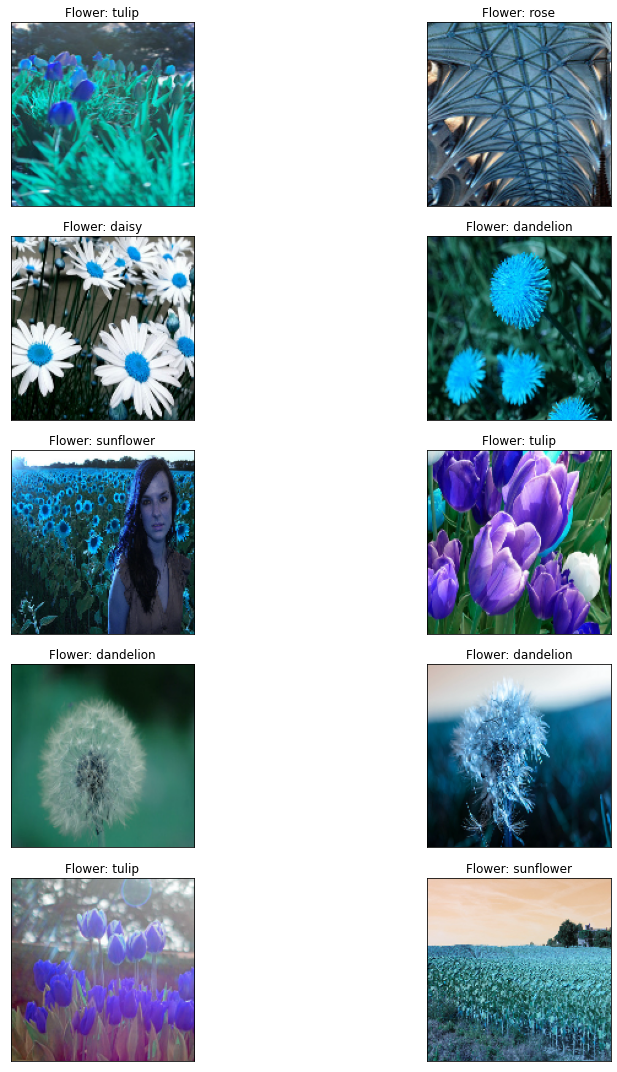

In [6]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)
for i in range(5):
  for j in range(2):
    l = rn.randint(0, len(Z))
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].imshow(X[l])
    ax[i,j].set_title('Flower: ' + Z[l])

plt.tight_layout()

In [7]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 5)
X = np.array(X)
X = X/255

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [9]:
model = Sequential()